In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model

import random
from random import randint
from io import StringIO

In [74]:
marketing = pd.read_csv("marketing2.csv", encoding='ISO-8859-1')
marketing.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [75]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [76]:
marketing.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [77]:
marketing.select_dtypes(include='object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [78]:
marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [79]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [80]:

# Menghitung rata-rata pendapatan
mean_income = marketing['Income'].mean()

# Mengisi nilai yang hilang dengan rata-rata pendapatan
marketing['Income'].fillna(mean_income, inplace=True)


In [81]:
print(marketing.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    9/4/2012       58       635  ...                  7             0   
1    3/8/2014       38        11  ...                  5             0   
2   8/21/2013       26       426  ...                  4             0   
3   2/10/2014       26        11  ...                  6             0   
4   1/19/2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

# Analisis Respons Kampanye

In [82]:
# Menghitung tingkat respons kampanye
marketing['Total_Campaigns_Accepted'] = marketing['AcceptedCmp1'] + marketing['AcceptedCmp2'] + marketing['AcceptedCmp3'] + marketing['AcceptedCmp4'] + marketing['AcceptedCmp5'] +marketing['Response']

# Menampilkan beberapa baris awal data yang telah diubah
print(marketing[['ID', 'Year_Birth', 'Total_Campaigns_Accepted']])




         ID  Year_Birth  Total_Campaigns_Accepted
0      5524        1957                         1
1      2174        1954                         0
2      4141        1965                         0
3      6182        1984                         0
4      5324        1981                         0
...     ...         ...                       ...
2235  10870        1967                         0
2236   4001        1946                         1
2237   7270        1981                         1
2238   8235        1956                         0
2239   9405        1954                         1

[2240 rows x 3 columns]


<Axes: title={'center': 'Tingkat Respons Kampanye berdasarkan Jenis Tawaran'}>

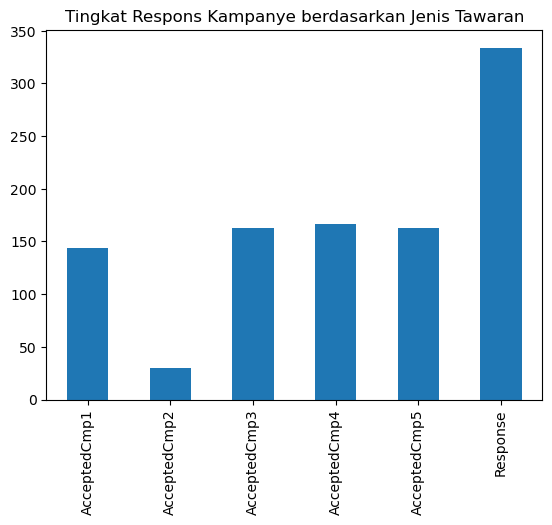

In [83]:
# Menghitung tingkat respons kampanye berdasarkan jenis tawaran
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_offers = marketing[campaign_columns]

campaign_offers.sum().plot(kind='bar', title='Tingkat Respons Kampanye berdasarkan Jenis Tawaran')



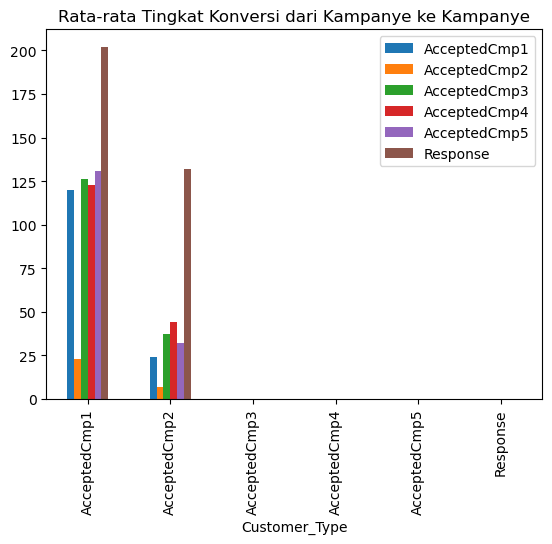

In [84]:
# Menghitung tingkat respons kampanye dari pelanggan lama vs. baru
marketing['Customer_Type'] = marketing['Dt_Customer'].apply(lambda x: 'New' if pd.to_datetime(x).year >= 2013 else 'Old')

customer_type_campaigns = marketing.groupby('Customer_Type')[campaign_columns].sum()
customer_type_campaigns.plot(kind='bar', title='Tingkat Respons Kampanye berdasarkan Tipe Pelanggan')

# Menghitung konversi dari kampanye ke kampanye
conversion_rate = campaign_offers.shift(periods=1, axis=1, fill_value=0) / campaign_offers
conversion_rate.fillna(0, inplace=True)

conversion_rate.mean().plot(kind='bar', title='Rata-rata Tingkat Konversi dari Kampanye ke Kampanye')

# Menampilkan grafik
import matplotlib.pyplot as plt
plt.show()

In [85]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Campaigns_Accepted,Customer_Type
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,3,11,1,1,Old
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,3,11,0,0,New
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,3,11,0,0,New
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,3,11,0,0,New
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,3,11,0,0,New


In [86]:
print(marketing['Customer_Type'].unique())

['Old' 'New']


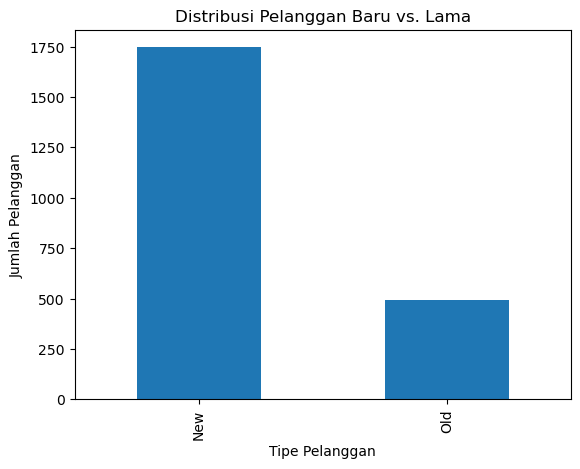

In [87]:
# Menampilkan distribusi pelanggan berdasarkan tipe
customer_type_distribution = marketing['Customer_Type'].value_counts()

customer_type_distribution.plot(kind='bar', title='Distribusi Pelanggan Baru vs. Lama')
plt.xlabel('Tipe Pelanggan')
plt.ylabel('Jumlah Pelanggan')

plt.show()


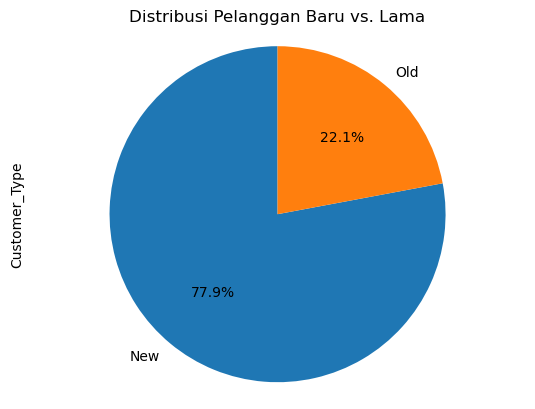

In [88]:
customer_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribusi Pelanggan Baru vs. Lama')
plt.axis('equal')

plt.show()


# Analisis Pelanggan

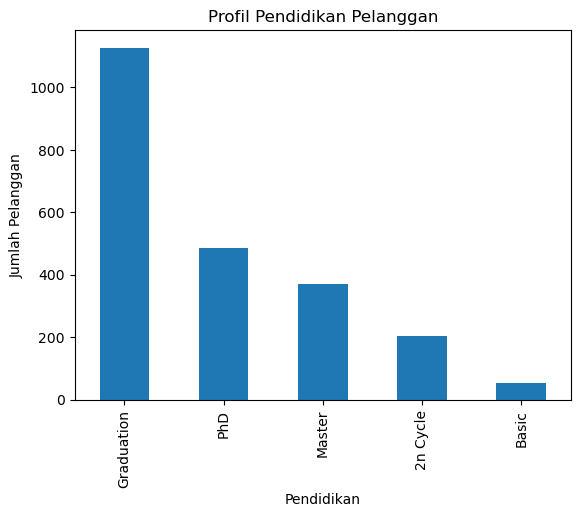

In [89]:

# Menampilkan profil pendidikan pelanggan
education_profile = marketing['Education'].value_counts()

education_profile.plot(kind='bar', title='Profil Pendidikan Pelanggan')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Pelanggan')

plt.show()


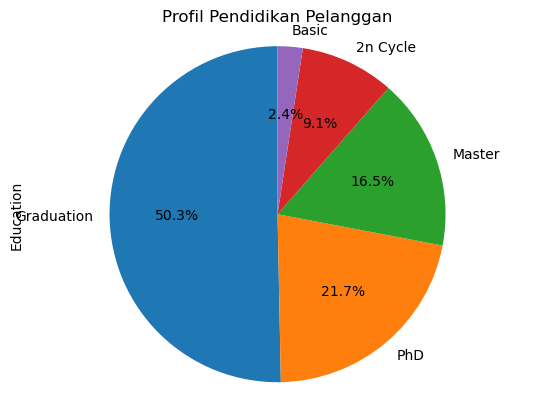

In [90]:

education_profile.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Profil Pendidikan Pelanggan')
plt.axis('equal')

plt.show()


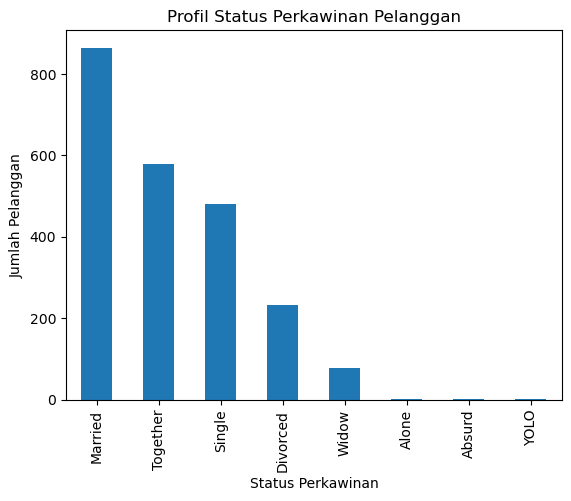

In [91]:
# Menampilkan profil status perkawinan pelanggan
marital_profile = marketing['Marital_Status'].value_counts()

marital_profile.plot(kind='bar', title='Profil Status Perkawinan Pelanggan')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah Pelanggan')

plt.show()


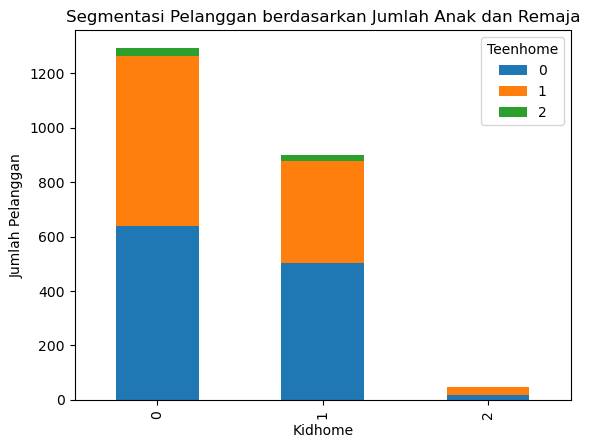

In [92]:
# Menampilkan segmentasi pelanggan berdasarkan jumlah anak dan remaja
kidteen_segmentation = marketing.groupby(['Kidhome', 'Teenhome']).size().unstack()

kidteen_segmentation.plot(kind='bar', stacked=True, title='Segmentasi Pelanggan berdasarkan Jumlah Anak dan Remaja')
plt.xlabel('Kidhome')
plt.ylabel('Jumlah Pelanggan')

plt.show()


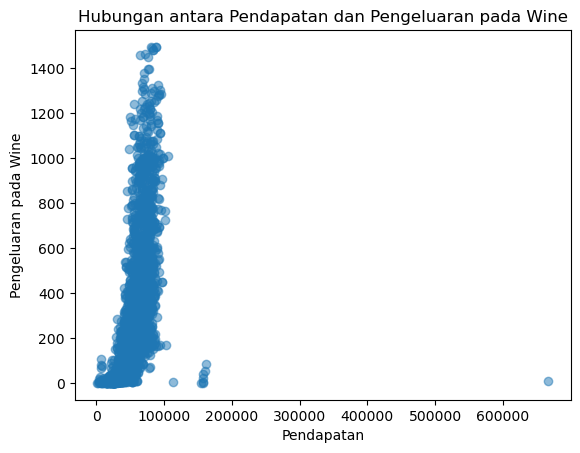

In [93]:
# Membuat scatter plot untuk menganalisis hubungan antara pendapatan dan pengeluaran
plt.scatter(marketing['Income'], marketing['MntWines'], alpha=0.5)
plt.title('Hubungan antara Pendapatan dan Pengeluaran pada Wine')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran pada Wine')
plt.show()


# Analisis Pengeluaran Produk

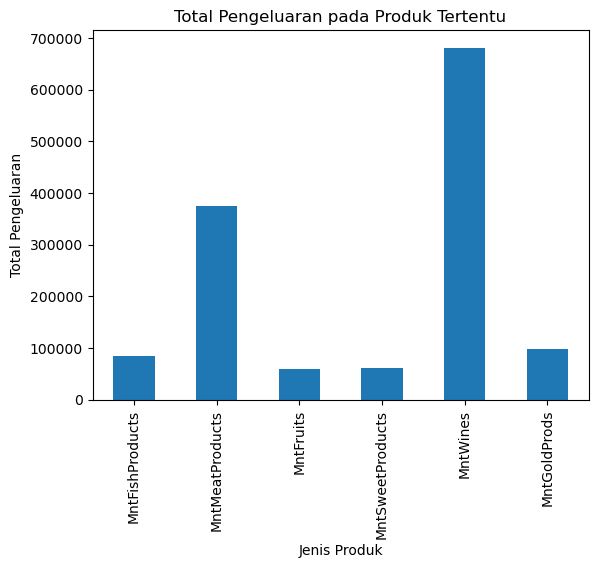

In [94]:

# Menghitung total pengeluaran pada produk tertentu
product_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']
total_spending = marketing[product_columns].sum()

total_spending.plot(kind='bar', title='Total Pengeluaran pada Produk Tertentu')
plt.xlabel('Jenis Produk')
plt.ylabel('Total Pengeluaran')

plt.show()


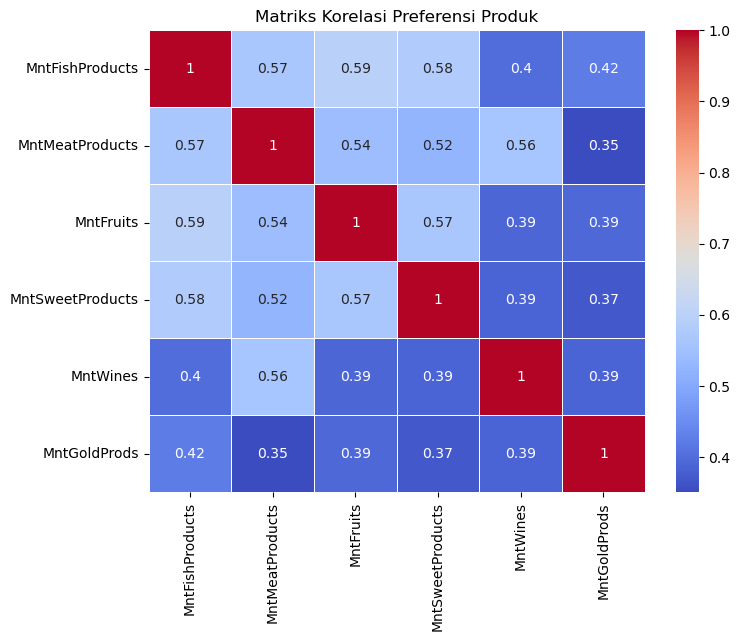

In [95]:
# Membuat matriks korelasi untuk melihat preferensi produk
product_preferences = marketing[product_columns].corr()
import seaborn as sns
# Menampilkan matriks korelasi sebagai heatmap
plt.figure(figsize=(8, 6))
plt.title('Matriks Korelasi Preferensi Produk')
sns.heatmap(product_preferences, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()


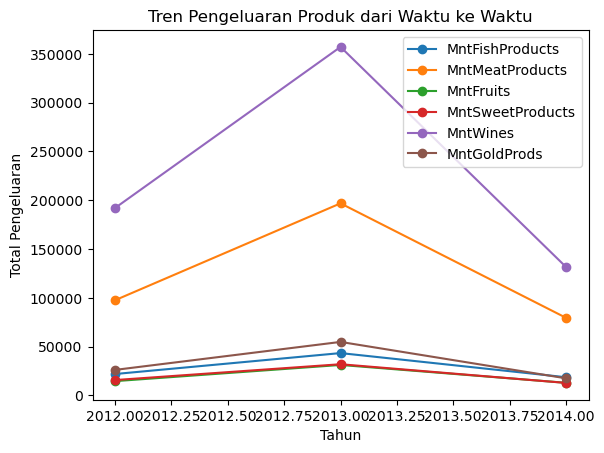

In [96]:
# Konversi kolom Dt_Customer ke tipe datetime
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'])

# Menghitung total pengeluaran produk per tahun
marketing['Year'] = marketing['Dt_Customer'].dt.year
yearly_spending = marketing.groupby('Year')[product_columns].sum()

yearly_spending.plot(kind='line', marker='o', title='Tren Pengeluaran Produk dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('Total Pengeluaran')
plt.legend(product_columns)

plt.show()


# Analisis Cara Belanja

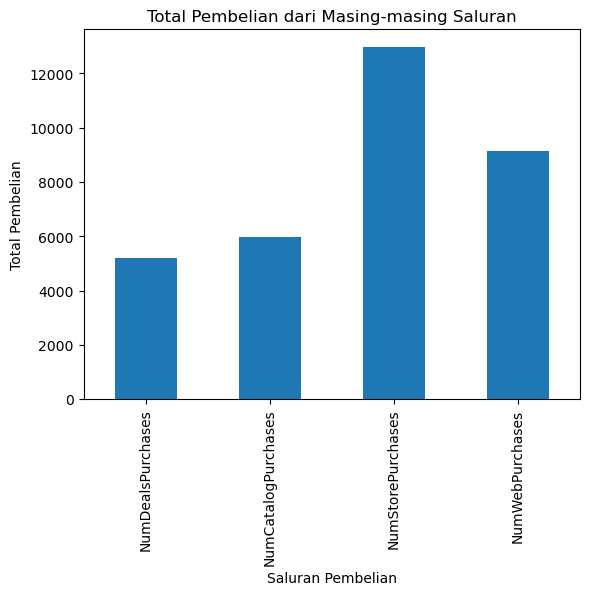

In [97]:

# Menghitung total pembelian dari masing-masing saluran
purchase_channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
total_purchases = marketing[purchase_channels].sum()

total_purchases.plot(kind='bar', title='Total Pembelian dari Masing-masing Saluran')
plt.xlabel('Saluran Pembelian')
plt.ylabel('Total Pembelian')

plt.show()


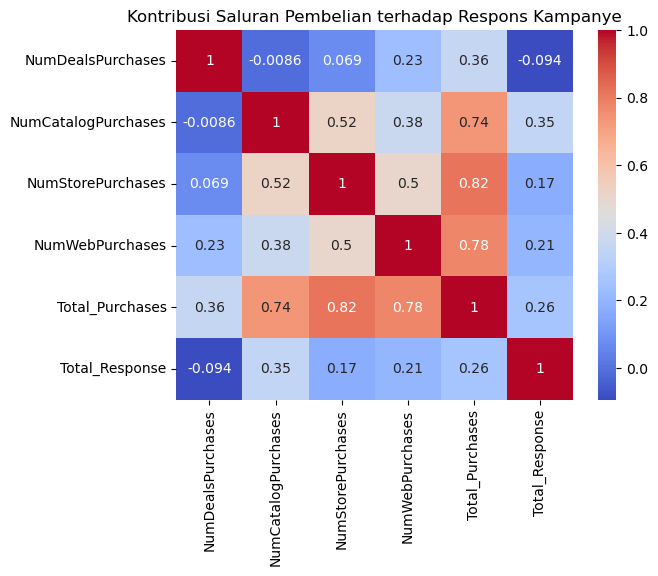

In [98]:
# Menambahkan kolom Total Purchases
marketing['Total_Purchases'] = marketing[purchase_channels].sum(axis=1)

# Menghitung kontribusi saluran pembelian terhadap respons kampanye
purchase_response_contrib = marketing[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].copy()
purchase_response_contrib['Total_Purchases'] = marketing['Total_Purchases']
purchase_response_contrib['Total_Response'] = marketing['AcceptedCmp1'] + marketing['AcceptedCmp2'] + marketing['AcceptedCmp3'] + marketing['AcceptedCmp4'] + marketing['AcceptedCmp5'] + marketing['Response']

# Menampilkan matriks korelasi sebagai heatmap
import seaborn as sns
sns.heatmap(purchase_response_contrib.corr(), annot=True, cmap='coolwarm')

plt.title('Kontribusi Saluran Pembelian terhadap Respons Kampanye')
plt.show()


# Analisis kepuasan dan keluhan pelanggan

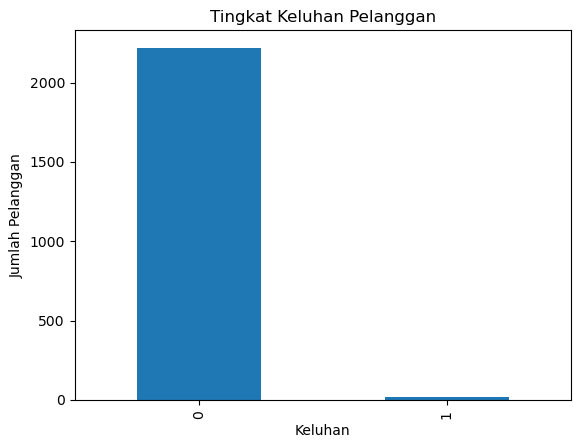

In [99]:
# Menghitung tingkat keluhan pelanggan
complain_rate = marketing['Complain'].value_counts()

complain_rate.plot(kind='bar', title='Tingkat Keluhan Pelanggan')
plt.xlabel('Keluhan')
plt.ylabel('Jumlah Pelanggan')

plt.show()


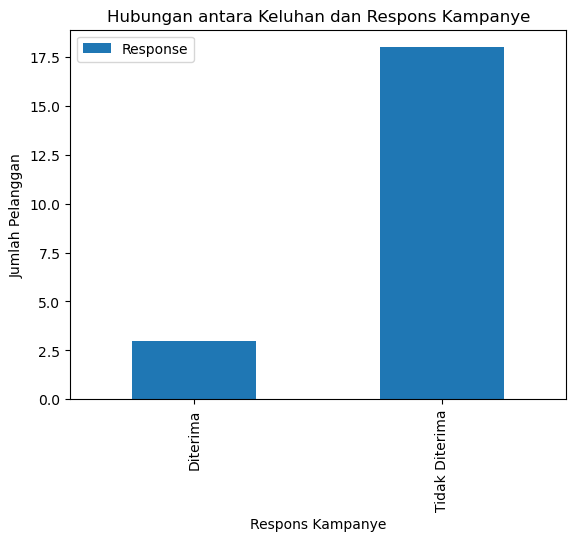

In [100]:
# Menghitung respons positif (diterima) dari pelanggan yang mengajukan keluhan
complain_positive_response = marketing[marketing['Complain'] == 1]['Response'].sum()

# Menghitung respons negatif (tidak diterima) dari pelanggan yang mengajukan keluhan
complain_negative_response = marketing[marketing['Complain'] == 1]['Response'].count() - complain_positive_response

# Menampilkan hubungan antara keluhan dan respons kampanye
response_data = pd.DataFrame({'Response': [complain_positive_response, complain_negative_response]}, index=['Diterima', 'Tidak Diterima'])
response_data.plot(kind='bar', title='Hubungan antara Keluhan dan Respons Kampanye')
plt.xlabel('Respons Kampanye')
plt.ylabel('Jumlah Pelanggan')

plt.show()


# Analisis retensi pelanggan

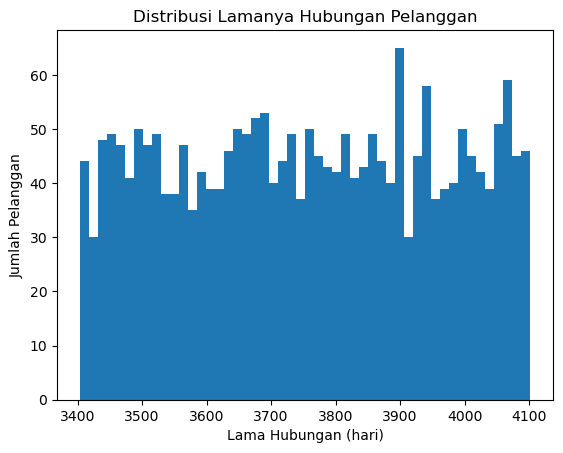

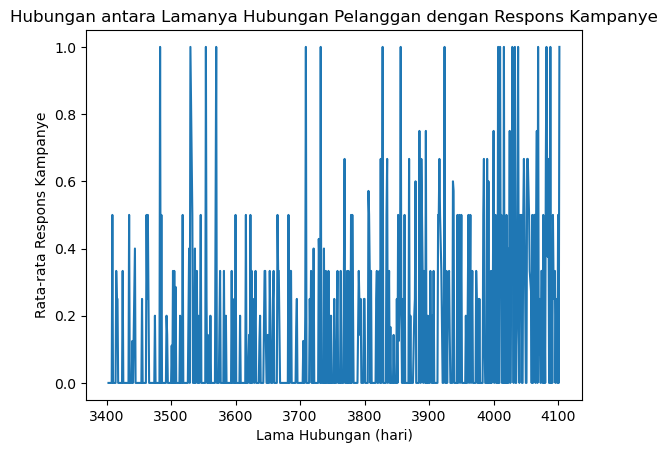

In [111]:
# Menghitung lamanya hubungan pelanggan
today = pd.to_datetime("2023-10-23")  # Tanggal saat ini atau saat analisis dilakukan
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'])
marketing['Customer_Relationship_Length'] = (today - marketing['Dt_Customer']).dt.days

# Menampilkan histogram lamanya hubungan pelanggan
plt.hist(marketing['Customer_Relationship_Length'], bins=50)
plt.title('Distribusi Lamanya Hubungan Pelanggan')
plt.xlabel('Lama Hubungan (hari)')
plt.ylabel('Jumlah Pelanggan')

plt.show()


# Menghitung hubungan antara lamanya hubungan pelanggan dengan respons kampanye
relationship_response = marketing.groupby('Customer_Relationship_Length')['Response'].mean()
relationship_response.plot(kind='line', title='Hubungan antara Lamanya Hubungan Pelanggan dengan Respons Kampanye')
plt.xlabel('Lama Hubungan (hari)')
plt.ylabel('Rata-rata Respons Kampanye')

plt.show()


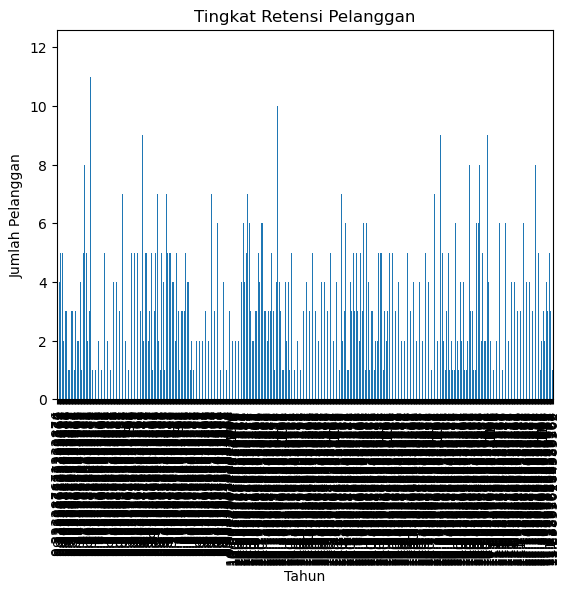

In [119]:
retention_rate = (marketing['Customer_Relationship_Length'] / 365).value_counts().sort_index()
retention_rate.plot(kind='bar', title='Tingkat Retensi Pelanggan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pelanggan')

plt.show() 

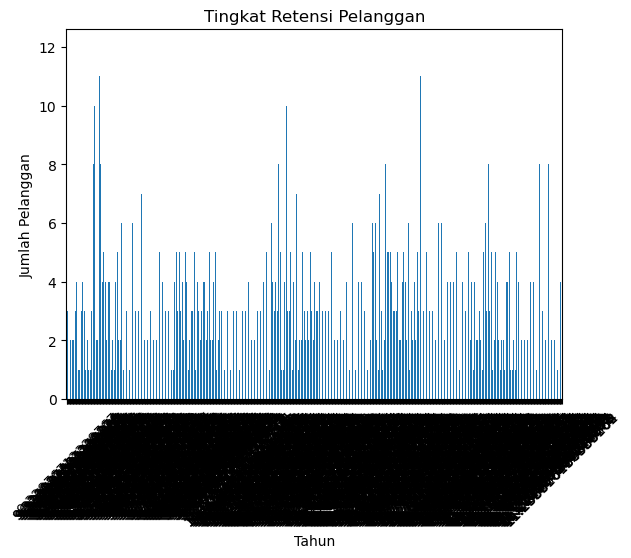

In [121]:
# Coba di rotasi
retention_rate = (marketing['Customer_Relationship_Length'] / 365).value_counts().sort_index()
retention_rate.plot(kind='bar', title='Tingkat Retensi Pelanggan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)

plt.show() 

In [126]:
today = pd.to_datetime("2023-10-23")  # Tanggal saat ini atau saat analisis dilakukan
marketing['Customer_Relationship_Length'] = today.year - marketing['Dt_Customer']

# Menggunakan frekuensi "D" (hari) untuk mengalikan jumlah hari
days_to_add = 365  # Misalnya, menambahkan 365 hari
marketing['Customer_Relationship_Length'] = marketing['Dt_Customer'] + pd.DateOffset(days=days_to_add)


TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

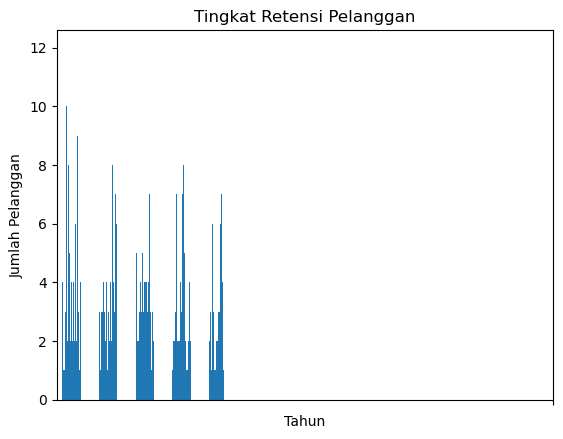

In [124]:
# Coba pake interval
retention_rate = (marketing['Customer_Relationship_Length'] / 365).value_counts().sort_index()
retention_rate.plot(kind='bar', title='Tingkat Retensi Pelanggan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(range(min(marketing_copy['Dt_Customer']), max(marketing_copy['Dt_Customer'])+1, 5))
plt.show() 

Misalnya, jika tahun maksimum dalam kolom "Dt_Customer" adalah 2020, maka max(marketing_copy['Dt_Customer'])+1 akan menghasilkan 2021. Hal ini dilakukan agar interval yang ditampilkan pada sumbu x dimulai dari tahun berikutnya.

Sedangkan angka 5 yang ada setelahnya (5) adalah langkah atau interval antara label-label pada sumbu x. Dalam contoh tersebut, label akan ditampilkan setiap 5 tahun, mulai dari tahun yang telah dihitung sebelumnya (2021 dalam contoh di atas).

# Analisis Hubungan Antar Variabel

•	Hubungan antara Pendapatan dan Pengeluaran Produk:
•	Hubungan antara Jumlah Anak dan Respons Kampanye:
•	Hubungan antara Kunjungan ke Situs Web dan Respons Kampanye:


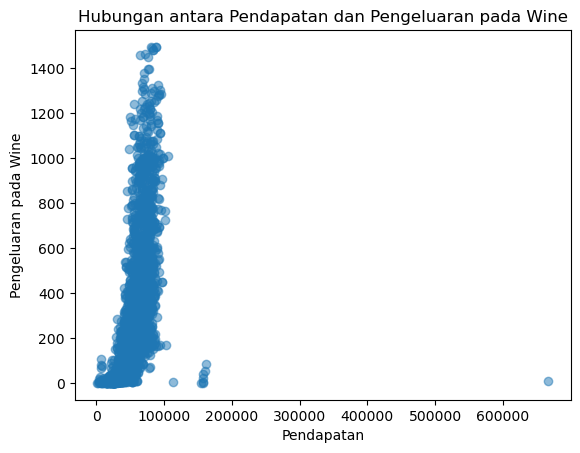

In [102]:
# Membuat scatter plot untuk menganalisis hubungan antara pendapatan dan pengeluaran pada produk
plt.scatter(marketing['Income'], marketing['MntWines'], alpha=0.5)
plt.title('Hubungan antara Pendapatan dan Pengeluaran pada Wine')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran pada Wine')

plt.show()

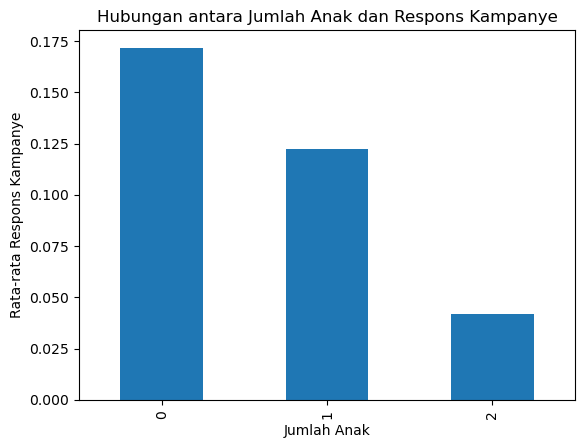

In [103]:
# Menganalisis hubungan antara jumlah anak dan respons kampanye
child_response = marketing.groupby('Kidhome')['Response'].mean()

child_response.plot(kind='bar', title='Hubungan antara Jumlah Anak dan Respons Kampanye')
plt.xlabel('Jumlah Anak')
plt.ylabel('Rata-rata Respons Kampanye')

plt.show()

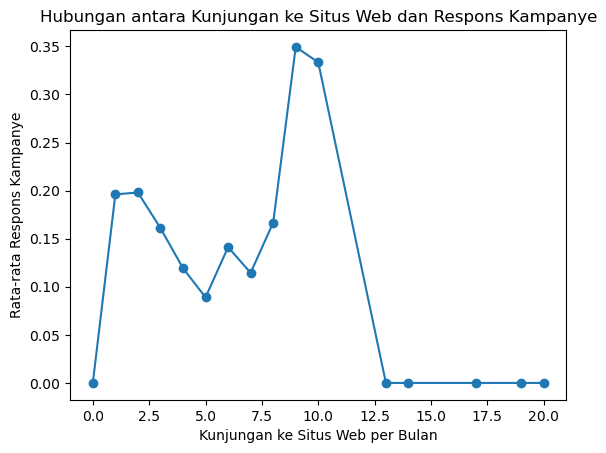

In [104]:
# Menganalisis hubungan antara kunjungan ke situs web dan respons kampanye
web_visits_response = marketing.groupby('NumWebVisitsMonth')['Response'].mean()

web_visits_response.plot(kind='line', marker='o', title='Hubungan antara Kunjungan ke Situs Web dan Respons Kampanye')
plt.xlabel('Kunjungan ke Situs Web per Bulan')
plt.ylabel('Rata-rata Respons Kampanye')

plt.show()


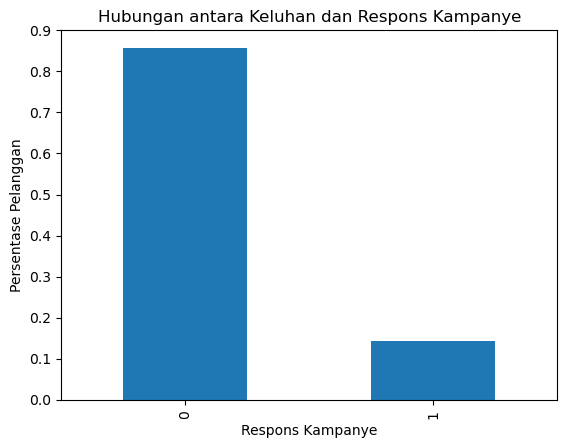

In [105]:


# Menghitung persentase respons kampanye positif (diterima) dan negatif (tidak diterima) untuk pelanggan yang mengajukan keluhan
complaint_response = marketing[marketing['Complain'] == 1]['Response'].value_counts(normalize=True)

complaint_response.plot(kind='bar', title='Hubungan antara Keluhan dan Respons Kampanye')
plt.xlabel('Respons Kampanye')
plt.ylabel('Persentase Pelanggan')

plt.show()


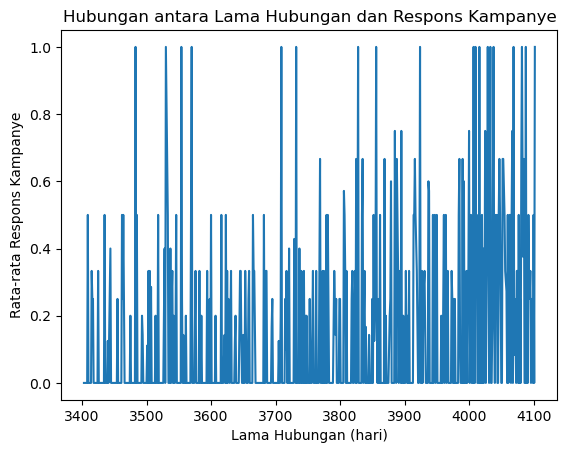

In [106]:
# Menganalisis hubungan antara lamanya hubungan pelanggan dan respons kampanye
relationship_response = marketing.groupby('Customer_Relationship_Length')['Response'].mean()

relationship_response.plot(kind='line', title='Hubungan antara Lama Hubungan dan Respons Kampanye')
plt.xlabel('Lama Hubungan (hari)')
plt.ylabel('Rata-rata Respons Kampanye')

plt.show()


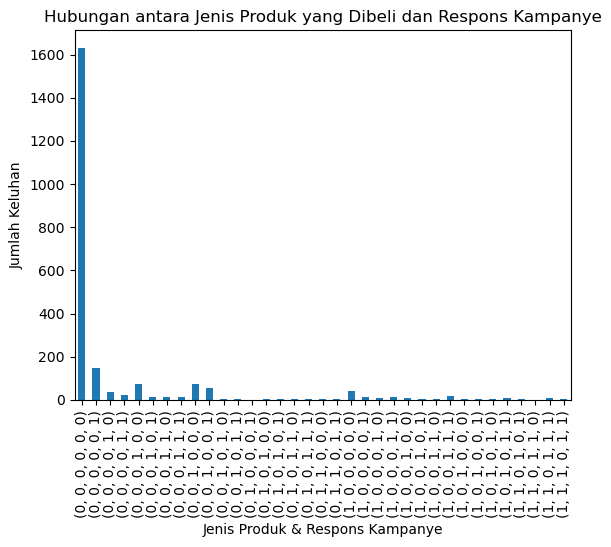

In [107]:
# Menganalisis hubungan antara jenis produk yang dibeli dan respons kampanye
product_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
product_response = marketing.groupby(product_columns)['Complain'].count()

product_response.plot(kind='bar', title='Hubungan antara Jenis Produk yang Dibeli dan Respons Kampanye')
plt.xlabel('Jenis Produk & Respons Kampanye')
plt.ylabel('Jumlah Keluhan')

plt.show()


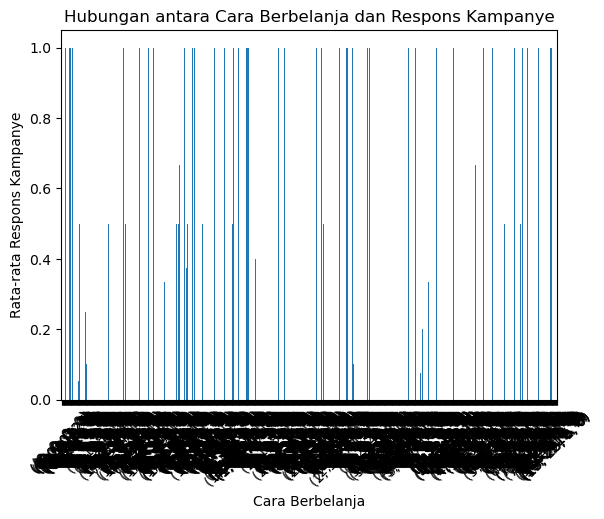

In [127]:

# Menganalisis hubungan antara cara berbelanja dan respons kampanye
purchase_channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
purchase_response = marketing.groupby(purchase_channels)['Response'].mean()

purchase_response.plot(kind='bar', title='Hubungan antara Cara Berbelanja dan Respons Kampanye')
plt.xlabel('Cara Berbelanja')
plt.ylabel('Rata-rata Respons Kampanye')
plt.xticks(rotation=45)

plt.show()


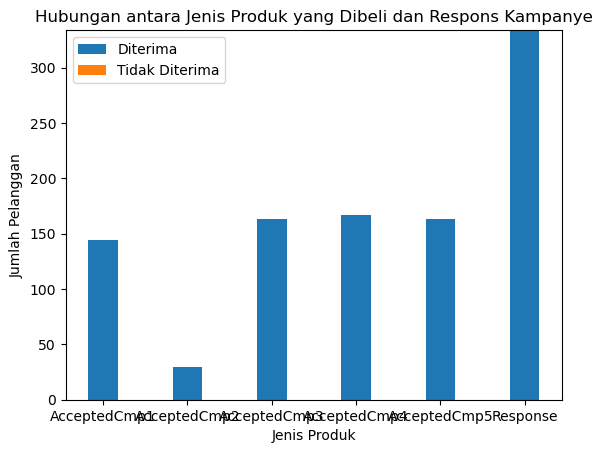

In [109]:

# Menganalisis hubungan antara jenis produk yang dibeli dan respons kampanye
product_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
product_response = marketing[product_columns]

# Menghitung jumlah respons positif (diterima) dan negatif (tidak diterima) untuk setiap jenis produk
positive_response = product_response[product_response == 1].sum()
negative_response = product_response[product_response == 0].sum()

# Menampilkan hasil dalam grafik batang
fig, ax = plt.subplots()
width = 0.35

ind = range(len(product_columns))
p1 = ax.bar(ind, positive_response, width, label='Diterima', align='center')
p2 = ax.bar(ind, negative_response, width, label='Tidak Diterima', bottom=positive_response)

ax.set_title('Hubungan antara Jenis Produk yang Dibeli dan Respons Kampanye')
ax.set_xlabel('Jenis Produk')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_xticks(ind)
ax.set_xticklabels(product_columns)
ax.legend()

plt.show()


In [110]:
import statsmodels.api as sm

# Memilih variabel-variabel yang akan digunakan dalam analisis regresi
X = marketing['Income']  # Variabel independen (Pendapatan)
y = marketing['MntWines']  # Variabel dependen (Pengeluaran pada Produk Anggur)

# Menambahkan konstanta ke variabel independen
X = sm.add_constant(X)

# Membangun model regresi
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     1116.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          7.78e-199
Time:                        03:25:33   Log-Likelihood:                -15759.
No. Observations:                2240   AIC:                         3.152e+04
Df Residuals:                    2238   BIC:                         3.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.1950     13.449     -7.524      0.0